# Chapter 8: AI Miscellanea

## Clustering

In machine learning, context **clustering** falls under the category of **unsupervised** learning. It means  that the computer must be able to divide the dataset into clustering (of some sort) **without information** about the cluster beforehand.

Clustering is used widely in data analysis to find patterns in data. For example:
- Grouping customers based on their past behavior
- Detecting outliers
- Market segmentation
- Recommendation engines
- Social network analysis

Clustering algorithms often use **distance calculations** to find **dense regions** of data in the feature space. Samples belonging to the same cluster should be close (or somehow similar) and samples belonging to different clusters should be less similar. Technically, clustering classes should have *high intra-class similarity* and *low inter-class similarity*

If the algorithm is based on **distance**, data is often **scaled** prior to clustering. Sometimes an algorithm needs the user to provide the number of clusters it should find. Other algorithms may ask the user for a distance which determines data items that are regarded as being close to each other.

Some popular clustering algorithms:
- k-means
- affinity propagation
- DBSCAN
- spectral clustering
- Birch

## k-means clustering

k-means algorithm is a very popular clustering algorithm. It works as follow:
1. Choose k centroids of clusters randomly (**k must be given**)
2. Assign each data point the same cluster as its closest centroid
3. Update centroids to be the means of the data points within the same cluster
4. Repeat steps 2 and 3 until no changes occur

The algorithm is quite simple and only needs to compute distances to centroids and means of the data points' clusters.

We illustrate this with this basic python implementation with some sample data, k=3 and random centroids:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

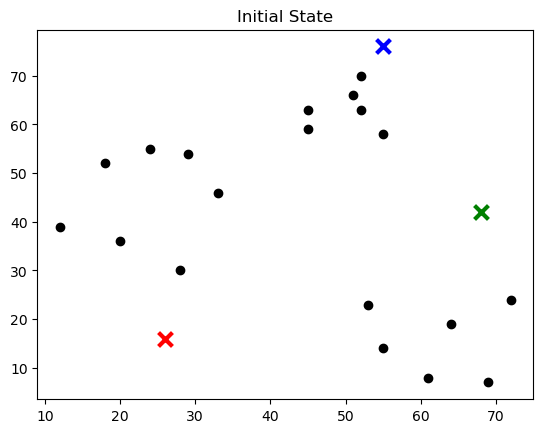

In [2]:
# Some sample data
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

k = 3   # nb of centroid
cols = {0: 'r', 1: 'g', 2: 'b'} # colors 
np.random.seed(200)

# Random Centroids
C = np.zeros( (k,2), dtype="int64")
for i in range(k):
    C[i,0] = np.random.randint(0,80)
    C[i,1] = np.random.randint(0,80)

# Plot them
plt.scatter(df.x, df.y, color = 'k')
plt.title("Initial State")
for i in range(k):
    plt.scatter(C[i,0], C[i,1], color = cols[i], marker="x", s = 100, linewidths=3)

For assigning each data points to a cluster

In [3]:
def assignment(df, C, cols):
    d0 = np.sqrt((np.array(df['x']) - C[0,0]) ** 2 + (np.array(df['y']) - C[0,1]) ** 2)
    d1 = np.sqrt((np.array(df['x']) - C[1,0]) ** 2 + (np.array(df['y']) - C[1,1]) ** 2)
    d2 = np.sqrt((np.array(df['x']) - C[2,0]) ** 2 + (np.array(df['y']) - C[2,1]) ** 2)

    d = np.vstack((d0,d1,d2)) # all distances to centroids
    cl = d.argmin(axis=0) # return index of min
    df['closest'] = cl

    df['color'] = df['closest'].map(lambda x: cols[x]) # return col name based on index

    return df

Assign them

In [4]:
df = assignment(df, C, cols)
df.head()

,x,y,closest,color
0,12,39,0,r
1,20,36,0,r
2,28,30,0,r
3,18,52,0,r
4,29,54,2,b


Plot them now

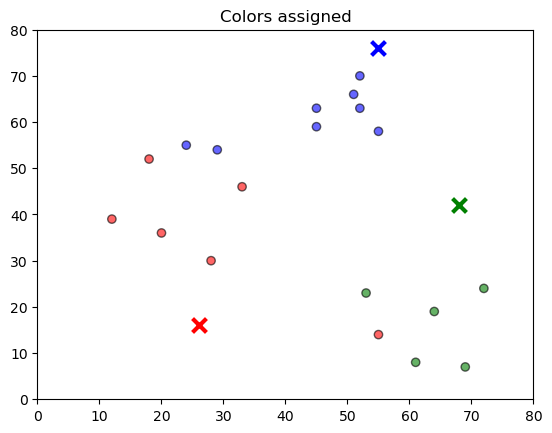

In [5]:
def plot_cluster(df, C, cols, title):
    plt.scatter(df.x, df.y, color = df.color, alpha = 0.6, edgecolors='k' )
    for i in range(k):
        plt.scatter(C[i,0], C[i,1], color = cols[i], marker = 'x', s = 100, linewidths=3)
    plt.xlim(0,80)
    plt.ylim(0,80)
    plt.title(title)
    plt.show()

plot_cluster(df, C, cols, "Colors assigned")

Note that there is one red dot in the middle of the green ones and two blue dots near the red ones.

Next we **update the centroids** to be in the **mean positions** of their respective clusters. We do that with a helper function:

In [6]:
def update(C):
    k = np.shape(C)[0]
    for i in range(k):
        C[i,0] = np.mean(df[df['closest'] == i]['x'])
        C[i,1] = np.mean(df[df['closest'] == i]['y'])

We now update the centroid position and re-assign

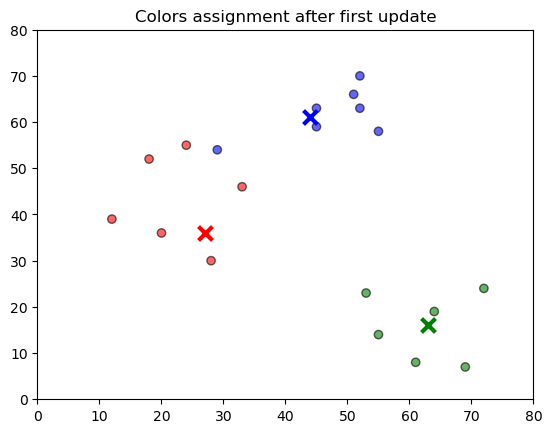

In [7]:
update(C)
df = assignment(df, C, cols)
plot_cluster(df, C, cols, "Colors assignment after first update")

We can see that there is still a blue dot near the red ones. We recenter the centroids and reupdate the assignment

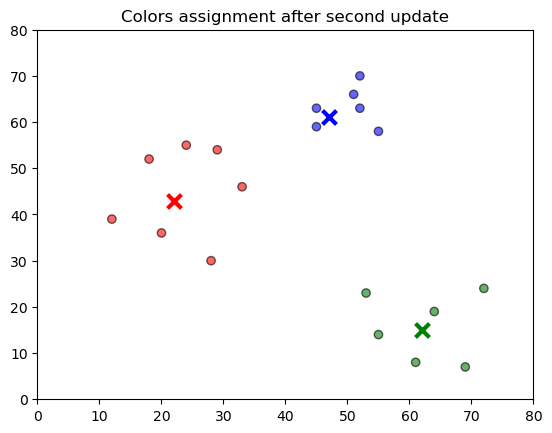

In [8]:
update(C)
df = assignment(df, C, cols)
plot_cluster(df, C, cols, "Colors assignment after second update")

This may be repeated a few times until no changes occur and we can finally see distinct clusters centered around their centroids.

## k-means in sklearn

Now  let's use `sklearn` library to apply k-means clustering algorithm.

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, SpectralClustering
import warnings
warnings.filterwarnings('ignore')


Let's generate some sample data

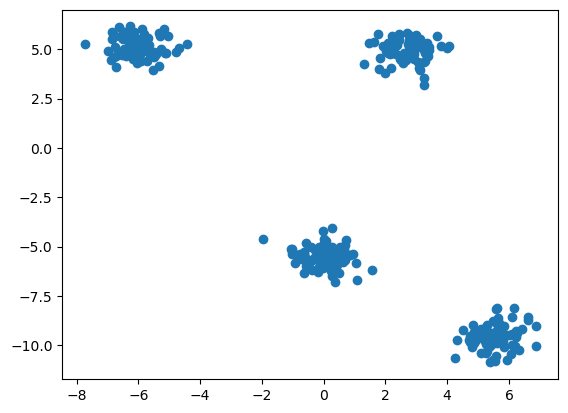

In [10]:
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.6, random_state = 10)
plt.scatter(X[:,0], X[:,1])
plt.show()

Using k-means algorithm is straightforward with `sklearn`

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[3 2 2 2 1 0 0 3 2 2 3 1 0 3 2 2 3 1 0 1 0 2 2 2 0 1 1 1 0 1 2 0 1 3 0 2 2
 2 1 2 2 3 1 2 1 3 1 2 2 1 2 2 3 3 0 0 2 3 0 0 2 0 0 3 0 3 1 1 0 1 2 1 0 3
 1 1 0 1 0 2 1 2 1 3 2 3 0 0 3 2 1 1 0 0 2 3 1 0 0 3 3 1 2 1 2 3 1 2 3 3 2
 0 1 0 2 3 2 0 0 1 2 0 2 1 2 3 0 2 1 3 3 3 1 2 0 3 2 3 2 0 0 3 0 2 3 2 3 2
 0 3 1 2 2 2 3 1 3 0 3 1 0 1 2 2 3 0 1 1 1 0 0 3 0 2 1 3 1 1 1 3 3 1 3 2 0
 1 3 2 2 3 3 1 3 0 1 0 0 1 3 3 1 0 1 2 0 3 0 0 2 0 3 0 1 0 3 0 1 0 0 2 2 0
 2 0 0 3 3 1 1 2 3 3 2 2 1 3 2 1 2 1 1 1 3 3 1 2 3 2 3 1 3 1 3 1 2 3 1 0 3
 0 3 0 2 3 1 2 3 0 3 1 0 1 2 2 0 0 0 1 1 3 2 1 1 0 0 0 3 1 3 0 3 3 2 2 0 3
 2 0 0 1]


Plot them

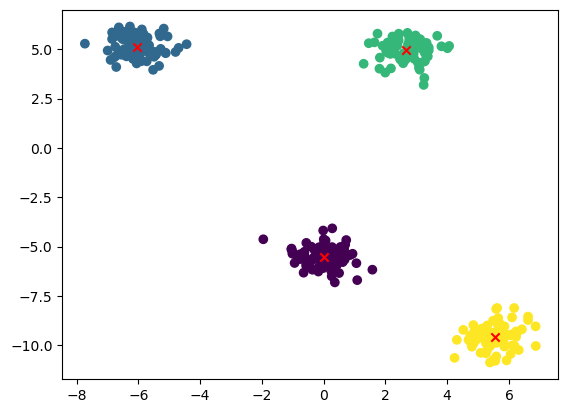

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='r', marker = 'x')
plt.show()

However if we look for six clusters, it would not perform well:

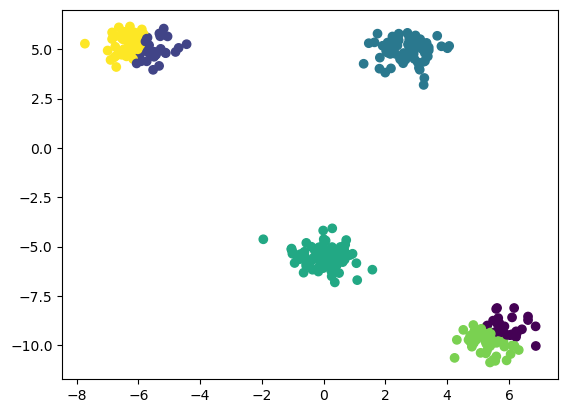

In [13]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

Another limitation of kmeans is that it does not work so well with complicated geometries such as below.

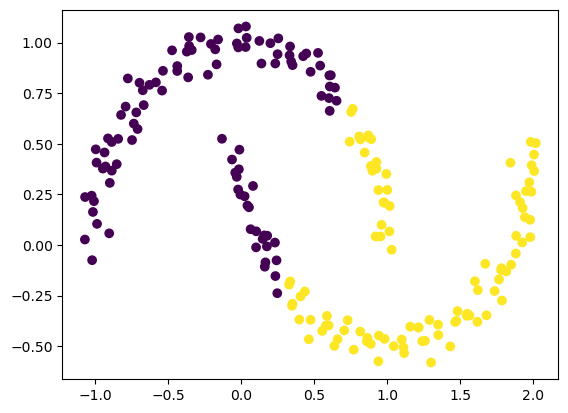

In [14]:
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

A solution is to apply **spectral clustering** algorithm as follows.

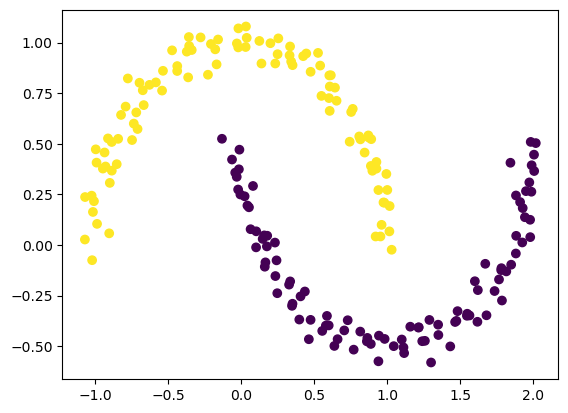

In [15]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

Spectral Clustering is somewhat similar to SVM when dealing with data that is not linearly separable. It transforms the data to higher dimensional space and performs the clustering there.

## Deep learning, basics

Deep learning is a subset of machine learning. With the advances in hardware, it allows to fix limitations of machine learning such as:
- high dimensionality in data
- feature extraction. In machine learning, features are provided by programmer (explanatory variables). But in many application, this is impossible to provide by programmer (think image classification)

In machine learning the user must tell the machine which features to look for in data. Deep learning on the other works intelligently and independently to find relevant features for each problem. Usually this requires much more data to be processed than in conventional machine learning.

Deep learning uses neural networks to simulate human thinking, reasoning and decision making.

Applications of deep learning
- chatbot
- image classification (medical imaging to tell if there is a cancer tumor in the image)
- self driving cars
- text translation

Requirements of deep learning
- data (the more the better)
- computational power (CPUs, but GPUs are better)
- training time is long

Deep learning has become accessible to wide audience with highly abstracted toolkits. In Python, the leading modules are Tensorflow and Keras which are maintained by Google and they evolve rapidly.

## Neural networks

Neural networks are artificial networks which attempt to mimic human brain. Human brain cells are called neurons in biology.

An artificial neural network (ANN) consists of dozens of neurons organized in layers.

(...)


## Deep learning with keras, MNIST

Install first `Tensoflow` with the following command. (The module `Keras` will automatically be downloaded with tensorflow).

`python -m pip install "tensorflow<2.11"`

As a first example of deep learning applications, we consider the famous MNIST dataset containing images of handwritten digits. The task is to classify them into categories 0-9 using a neural network.

In [16]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from keras.datasets import mnist
from keras import utils
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout


(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape: ", X_train.shape)
print("X_test shape:  ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

X_train shape:  (60000, 28, 28)
X_test shape:   (10000, 28, 28)
y_train shape:  (60000,)
y_test shape:   (10000,)


Let's have a visual understanding of the dataset with matplotlib to display some of the images in the training set.

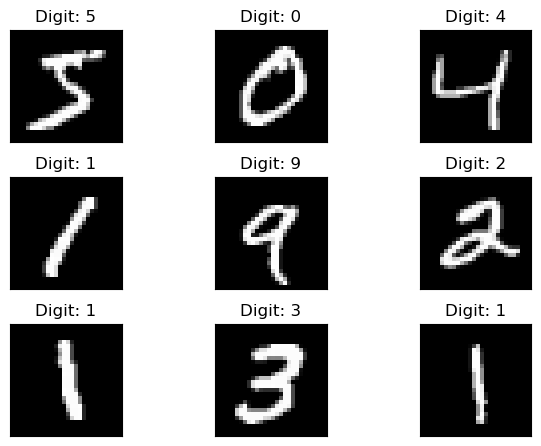

In [17]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

To prepare the data for training we 
- reshape it to vectors of 784 elements,
- convert to floating point and
- normalize to be between 0 and 1.

In [18]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255 # normalize image grey scale
X_test /= 255

print("X_train shape :", X_train.shape)
print("X_test shape : ", X_test.shape)

X_train shape : (60000, 784)
X_test shape :  (10000, 784)


The training and testing labels are **"one hot encoded"** to categorical form

In [19]:
print("y_train shape :", y_train.shape)
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)
print("Y_train shape: ", Y_train.shape)

y_train shape : (60000,)
Y_train shape:  (60000, 10)


Now it is time to build the artificial neural network. We will have two hidden layers with 512 nodes each and the output layer with 10 nodes.

All layers are fully connected or "dense".

- The first hidden layer indicates also the shape of the input (here 784).
- We use the ReLU activation in the input layer.
- Dropout rate avoids overfitting by ignoring certain amount of weights when updating.
- The last activation function is the softmax
$$ \phi(x) = \frac{e^x_j}{\sum_i e^{x_i}}$$ 

which is a common choice for multiclass problems. It normalizes the output to a probability distribution i.e. the model outputs the chance of the input being from each class.

In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

With Keras, one must compile the model which means that we specify the loss function and optimizer

In [21]:
model.compile(loss = 'categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Fitting of the model is done using

In [22]:
history = model.fit(X_train, Y_train,
                    batch_size = 128, epochs = 5, verbose = 2,
                    validation_data=(X_test, Y_test))

Epoch 1/5
469/469 - 3s - 7ms/step - accuracy: 0.9244 - loss: 0.2496 - val_accuracy: 0.9665 - val_loss: 0.1071
Epoch 2/5
469/469 - 2s - 5ms/step - accuracy: 0.9686 - loss: 0.1007 - val_accuracy: 0.9741 - val_loss: 0.0814
Epoch 3/5
469/469 - 2s - 5ms/step - accuracy: 0.9779 - loss: 0.0710 - val_accuracy: 0.9790 - val_loss: 0.0695
Epoch 4/5
469/469 - 2s - 5ms/step - accuracy: 0.9817 - loss: 0.0568 - val_accuracy: 0.9803 - val_loss: 0.0636
Epoch 5/5
469/469 - 2s - 5ms/step - accuracy: 0.9849 - loss: 0.0448 - val_accuracy: 0.9798 - val_loss: 0.0677


Here
- `epochs` is the number of iterations that the weights are updated
- `batch_size` allows keras to work in parallel for improved speed
- `verbose=2` to show training progress

Since training may take some time, it is a good idea to save the trained model and to reload it in the following way:

In [23]:
# model.save("mnist_model.h5", save_format="h5")
# model = load_model('mnist_model.h5')

Evaluation is done as follows

In [24]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose = 2)
print("Test Loss ", loss_and_metrics[0])
print("Test Accuracy ", loss_and_metrics[1])

313/313 - 0s - 962us/step - accuracy: 0.9798 - loss: 0.0677
Test Loss  0.06767716258764267
Test Accuracy  0.9797999858856201


To prepare the confusion matrix, we need to predict on the testing set first

In [25]:
predict_x = model.predict(X_test)
print("Predicted shape :", predict_x.shape)
predicted_classes = np.argmax(predict_x, axis= 1) # index of max probability
print("Predicted classes shape :", predicted_classes.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted shape : (10000, 10)
Predicted classes shape : (10000,)


It basically gives a probabily to have each class. Let's have a look at the first prediction.

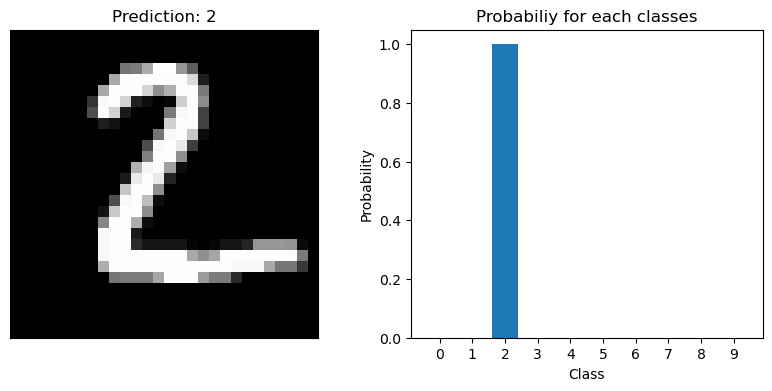

In [26]:
# print("Probabilities")
# print(predict_x[0]) # probabilities to have each class
# print("Prediction (class with highest prob): ", predicted_classes[0]) # index of max prob (selected class predicted)

case = 1

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(X_test[case].reshape(28,28), cmap='gray', interpolation='none' )
plt.xticks([])
plt.yticks([])
plt.title("Prediction: {}".format(predicted_classes[case]))

plt.subplot(1,2,2)
plt.bar(range(10), predict_x[case])
plt.title("Probabiliy for each classes")
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

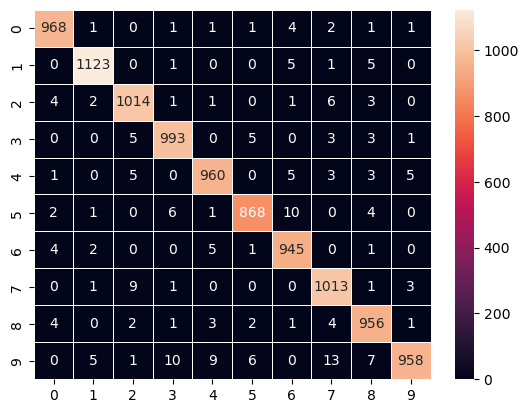

In [27]:
cm = confusion_matrix(y_test, predicted_classes)
# print(cm)
# plt.figure(figsize=(12,6))
sns.heatmap(cm, annot = True, linewidths= 0.5 , fmt='d' )
plt.show()

And last, let's have a look at some of the correct and incorrect predictions.

In [28]:
correct_idx = np.nonzero(predicted_classes == y_test)[0]
incorrect_idx = np.nonzero(predicted_classes != y_test)[0]
print(len(correct_idx)," correct predictions")
print(len(incorrect_idx)," incorrect predictions")

9798  correct predictions
202  incorrect predictions


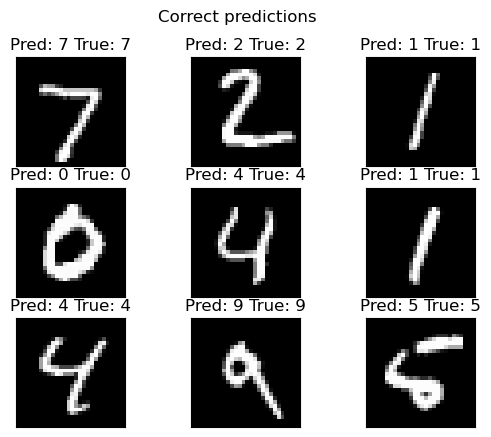

In [29]:
for i, idx in enumerate(correct_idx[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {} True: {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Correct predictions")
plt.show()


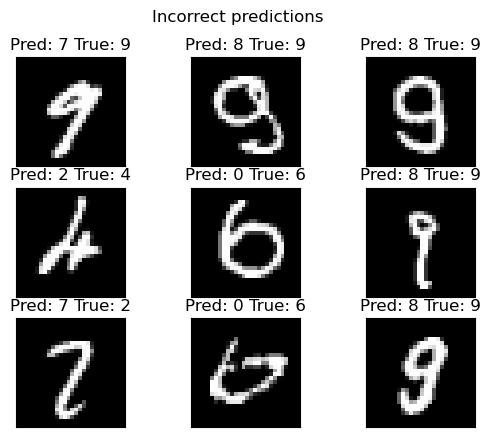

In [30]:
for i, idx in enumerate(incorrect_idx[:9]):
    plt.subplot(3,3, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Pred: {} True: {}".format(predicted_classes[idx], y_test[idx]))
    plt.xticks([])
    plt.yticks([])
plt.suptitle("Incorrect predictions")
plt.show()

Looking at the incorrect predictions, we see that some of these would have quite hard to guess even for human observer.

# Deep learning with keras, image classification

[Tutorial source of source](https://www.tensorflow.org/tutorials/keras/classification)

As the second deep learning example, we are going to classify images representing items of clothing using Fashion MNIST dataset from Keras. 

In [31]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [32]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(train_images.shape)

(60000, 28, 28)


The images are again 28x28 pixels and there are 60'000 training samples.
- We scale the data to be between 0 and 1
- We specify the class names for easier handling

In [33]:
train_images = train_images / 255.0
test_images = test_images / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's have a look at the first 16 training sample images

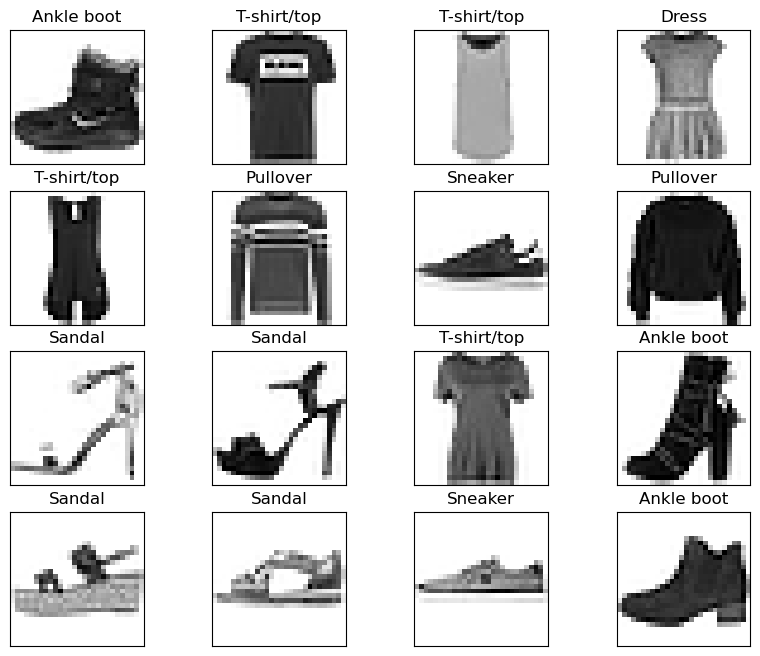

In [34]:
plt.figure(figsize=(10,8))
for i in range(16):
    plt.subplot(4,4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
plt.show()

Next we build the network, compile it and save it to the disk. We have only one hidden layer with 128 nodes and output layer with 10 nodes.

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 917us/step - accuracy: 0.7803 - loss: 0.6304
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.8661 - loss: 0.3764
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 868us/step - accuracy: 0.8756 - loss: 0.3411
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 873us/step - accuracy: 0.8849 - loss: 0.3124
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.8929 - loss: 0.2892
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8965 - loss: 0.2791
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 878us/step - accuracy: 0.9017 - loss: 0.2687
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 880us/step - accuracy: 0.9035 - loss: 0.2577
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 882us/step - accuracy: 0.9083 - loss: 0.2425
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.9121 - loss: 0.2369


Saving and loading can be achieved in the following way

In [36]:
# model.save("fashion_model.h5", activation="h5")
# model = tf.keras.models.load_model('fashion_model.h5')

Let's evaluate the model

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - 847us/step - accuracy: 0.8831 - loss: 0.3391

Test accuracy: 0.8830999732017517


Prediction on the test data.

In [38]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

print("Probabilities: ", predictions[0])
print("Prediction: ", np.argmax(predictions[0]))
print("Name of the label :" , class_names[np.argmax(predictions[0])])
print("True label: ", test_labels[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step
Probabilities:  [1.7627183e-06 6.5713239e-09 1.1541974e-07 1.9103519e-09 6.1428796e-07
 1.5765938e-03 2.5321523e-07 2.5123514e-02 5.3189262e-07 9.7329670e-01]
Prediction:  9
Name of the label : Ankle boot
True label:  9


Visually how it looks

In [39]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:4.2f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    # plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    plt.ylabel("probability")
    plt.xlabel("classes")

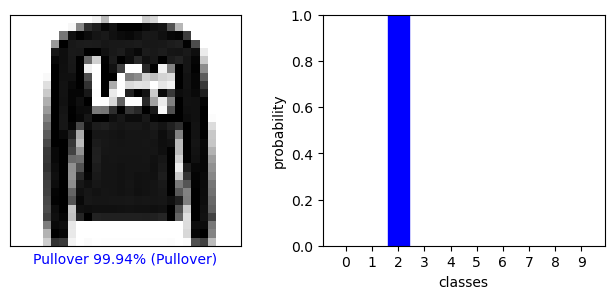

In [40]:
i = 1 # sample number

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

This shows hot the network predicts the probability of a sample belonging to a given class. Highest probability wins using `np.argmax()`

In [41]:
img = test_images[i] # i is the sample number
img = (np.expand_dims(img,0))

predictions_single = probability_model.predict(img)
print(class_names[np.argmax(predictions_single[0])])
print("true=",class_names[test_labels[i]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Pullover
true= Pullover


Here is a case of false prediction

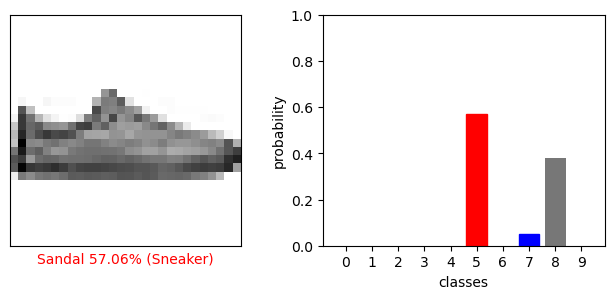

In [42]:
i = 12 # sample number

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

## AI Ethics

(...)